In [7]:
# importing libraries 
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm


#preparing data 
file = "./GOT_character_predictions.xlsx"

got = pd.read_excel(file)

#displaying data 
got.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


<h3> Exploring GOT Data </h3>

In [8]:
# exploratory data 
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [9]:
# exploratory data 
got.describe()

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
count,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,26.000000,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,1577.364896,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,0.192308,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.089584,0.745632
std,561.906131,19565.414460,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,0.401918,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.160568,0.435617
min,1.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000
25%,487.250000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.013378,0.000000
50%,973.500000,268.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.033445,1.000000
75%,1459.750000,285.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.086957,1.000000
max,1946.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000


In [10]:
# data dictionary
file = "./GOT_data_dictionary.xlsx"
got_description = pd.read_excel(file)


# displaying the data dictionary
got_description

,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measu...
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house ...
9,spouse,Character's spouse(s)


<h3> Missing Value Insights </h3>

Based on the prediction that is being made for (Y variable - isAlive), it is necessary to fill the missing variables prior building our model. To fill in the missing values for dateOfBirth and age, median was used, as they are int data types. For mother, father, heir, and spouse dummy variables were created in new columns. From these columns, data use such isAliveMother, isAliveFather, isAliveSpouse, and isAliveHeir were able to be filled. 


Additionally, gender_dector_guesser was attempted, however more than 50% of the names resulted in 'unknown' and 'female' and 'male' not being able to be equally divided for training/testing purposes for modeling. Therefore the variable for gender was not added. 



In [11]:
# missing values 
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [12]:
# imputing missing values that are relevant 

#imputing missing values for dateOfBirth 
got['dateOfBirth'].fillna(int(got['dateOfBirth'].median()), inplace=True)

#imputing missing values for age
got['age'].fillna(int(got['age'].median()), inplace=True)


# instatiating an imputation text for features with missing values
fill_title   = 'unknown_title'
fill_culture = 'unknown_culture'
fill_mother  = 'unknown_mother'
fill_father  = 'unknown_father'
fill_heir    = 'unknown_heir'
fill_house   = 'unknown_house'
fill_spouse  = 'unknown_spouse'



# imputing missing values for title
got['title'] = got['title'].fillna(fill_title) 

# creating a new column with a placeholder object
got['has_title'] = 0

# making dummy where unknown_title = 0 and those with title = 1
for index, value in got.iterrows():
    
    # creating dummies for those that have titles that are unknown = 1, so missing values = 0
    if got.loc[index, 'title'] != 'unknown_title':
        got.loc[index, 'has_title'] = 1
        
    elif got.loc[index, 'title'] == 'unknown_title':
        got.loc[index, 'has_title'] = 0
        
      
    
#imputing missing values for culture 
got['culture'] = got['culture'].fillna(fill_culture)

# creating a new column with a placeholder object
got['has_culture'] = 0

# making dummy where unknown_culture = 0 and those with culture = 1
for index, value in got.iterrows():
    
    # Creating dummies for those cultures that are known,  has_culture = 1, so missing values = 0
    if got.loc[index, 'culture'] != 'unknown_culture':
        got.loc[index, 'has_culture'] = 1
        
    elif got.loc[index, 'culture'] == 'unknown_culture':
        got.loc[index, 'has_culture'] = 0


        
 # imputing missing values for heir
got['heir'] = got['heir'].fillna(fill_heir)

# creating a new column with a placeholder object
got['has_heir'] = 0

# making dummy where unknown_heir = 0 and those with heir = 1
for index, value in got.iterrows():
    
    # creating dummies for those that have heirs, has_heir = 1, so missing values = 0
    if got.loc[index, 'heir'] != 'unknown_heir':
        got.loc[index, 'has_heir'] = 1
        
    elif got.loc[index, 'heir'] == 'unknown_heir':
        got.loc[index, 'has_heir'] = 0       
        

# imputing missing values for father
got['father'] = got['father'].fillna(fill_father)

# creating a new column with a placeholder object
got['has_father'] = 0

# making dummy where unknown_father = 0 and those with father = 1
for index, value in got.iterrows():
    
    # creating dummies for those that have father's name, has_father = 1, so missing values = 0
    if got.loc[index, 'father'] != 'unknown_father':
        got.loc[index, 'has_father'] = 1
        
    elif got.loc[index, 'father'] == 'unknown_father':
        got.loc[index, 'has_father'] = 0
        
        
# imputing missing values for mother
got['mother'] = got['mother'].fillna(fill_mother)

# creating a new column with a placeholder object
got['has_mother'] = 0

# making dummy where unknown_mother = 0 and those with mother = 1
for index, value in got.iterrows():
    
    # Creating a dummy for those that have mother's name, has_mother = 1, so missing values = 0
    if got.loc[index, 'mother'] != 'unknown_mother':
        got.loc[index, 'has_mother'] = 1
        
    elif got.loc[index, 'mother'] == 'unknown_mother':
        got.loc[index, 'has_mother'] = 0 


        
# imputing missing values for house
got['house'] = got['house'].fillna(fill_house)

# creating a new column with a placeholder object
got['has_house'] = 0

# making dummy where unknown_house = 0 and those with house = 1
for index, value in got.iterrows():
    
    # Creating dummies for those that have house names, has_house = 1, so missing values = 0
    if got.loc[index, 'house'] != 'unknown_house':
        got.loc[index, 'has_house'] = 1
        
    elif got.loc[index, 'house'] == 'unknown_house':
        got.loc[index, 'has_house'] = 0
        

# imputing missing values for spouse
got['spouse'] = got['spouse'].fillna(fill_spouse)

# creating a new column with a placeholder object
got['has_spouse'] = 0

# making dummy where unknown_spouse = 0 and those with spouse = 1
for index, value in got.iterrows():
    
    # Creating dummies for those that have spouses, for has_spouse = 1, so missing values = 0
    if got.loc[index, 'spouse'] != 'unknown_spouse':
        got.loc[index, 'has_spouse'] = 1
        
    elif got.loc[index, 'spouse'] == 'unknown_spouse':
        got.loc[index, 'has_spouse'] = 0            

        
#imputing missing values for isAliveMother, if has_mother = 1, then isAliveMother = 1
for index, value in got.iterrows():
    
    if got.loc[index, 'has_mother'] == 1:
        got.loc[index, 'isAliveMother'] = 1
        
    elif got.loc[index, 'has_mother'] == 0:
        got.loc[index, 'isAliveMother'] = 0

#imputing missing values for isAliveFather, if has_father = 1, then isAliveFather = 1
for index, value in got.iterrows():
    
    if got.loc[index, 'has_father'] == 1:
        got.loc[index, 'isAliveFather'] = 1
        
    elif got.loc[index, 'has_father'] == 0:
        got.loc[index, 'isAliveFather'] = 0


#imputing missing values for isAliveHeir, if has_heir = 1, then isAliveheir = 1
for index, value in got.iterrows():
    
    if got.loc[index, 'has_heir'] == 1:
        got.loc[index, 'isAliveHeir'] = 1
        
    elif got.loc[index, 'has_heir'] == 0:
        got.loc[index, 'isAliveHeir'] = 0


#imputing missing values for isAliveSpouse, if isMarried = 1, then isAliveSpouse = 1
for index, value in got.iterrows():
    
    if got.loc[index, 'isMarried'] == 1:
        got.loc[index, 'isAliveSpouse'] = 1
        
    elif got.loc[index, 'isMarried'] == 0:
        got.loc[index, 'isAliveSpouse'] = 0

In [13]:
# checking for missing values that have been filled 
got.isnull().any()

S.No                          False
name                          False
title                         False
culture                       False
dateOfBirth                   False
mother                        False
father                        False
heir                          False
house                         False
spouse                        False
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                 False
isAliveFather                 False
isAliveHeir                   False
isAliveSpouse                 False
isMarried                     False
isNoble                       False
age                           False
numDeadRelations              False
popularity                    False
isAlive                       False
has_title                     False
has_culture                   False
has_heir                    

<h5> Gender Guessor  </h5>
Goal is to determine which names are male to create the missing variable male. 

However, this reflected a -0.00 correlation when compared to isAlive, therefore it was nor necessary to use this variable. 

<h5> Correlation  </h5>

In [14]:
# creating correlation between features 
got_corr = got.corr(method = 'pearson')

# filtering the results to only show correlations with isAlive
got_corr.loc[ : ,"isAlive"].round(decimals = 2).sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
age                           0.05
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isNoble                      -0.04
has_house                    -0.04
has_culture                  -0.04
has_title                    -0.04
isMarried                    -0.05
dateOfBirth                  -0.05
has_spouse                   -0.05
isAliveSpouse                -0.05
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.13
has_heir                     -0.13
S.No                         -0.13
isAliveFather                -0.14
isAliveMother                -0.14
has_father                   -0.14
has_mother                   -0.14
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

<h5> Preparing Explanatory and Response Data </h5>

In [15]:
# declaring explanatory variables
got_data = got.drop('isAlive', axis = 1)


# declaring response variable
got_target = got.loc[:,'isAlive']

<h5> Prepare train-test split for statsmodels </h5>

In [16]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [17]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")




Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



<h3> Classification Modeling </h3>

<h4> Featuring Engineering </h4>

In [18]:
#featured engineering 

# effects of book 4 and book 5 
got['book4_book5'] = got['book4_A_Feast_For_Crows']+(got['book5_A_Dance_with_Dragons']/2)

# effects of numDeadRelatives and has_heir
got['numDeadRelatives_has_title'] = got['numDeadRelations']+(got['has_heir']/2)

# effects of has_father + isAliveHeir
got['hasFth_Aheir'] = got['has_father']+(got['isAliveHeir']/2)

# effects of has_mother + isAliveHeir
got['hasMth_Aheir'] = got['has_mother']+(got['isAliveHeir']/2)

In [19]:
# creating correlation between features 
got_corr = got.corr(method = 'pearson')

# filtering the results to only show correlations with isAlive
got_corr.loc[ : ,"isAlive"].round(decimals = 2).sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
book4_book5                   0.23
age                           0.05
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
has_house                    -0.04
isNoble                      -0.04
has_culture                  -0.04
has_title                    -0.04
dateOfBirth                  -0.05
isMarried                    -0.05
has_spouse                   -0.05
isAliveSpouse                -0.05
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.13
has_heir                     -0.13
S.No                         -0.13
isAliveFather                -0.14
isAliveMother                -0.14
hasFth_Aheir                 -0.14
has_father                   -0.14
has_mother                   -0.14
hasMth_Aheir                 -0.15
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelatives_has_title   -0.19
numDeadRelations             -0.19
Name: isAlive, dtype

In [20]:
# using column to add + to copy for regression 
for column in got: 
    print( f" {column} + ")

 S.No + 
 name + 
 title + 
 culture + 
 dateOfBirth + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 isAlive + 
 has_title + 
 has_culture + 
 has_heir + 
 has_father + 
 has_mother + 
 has_house + 
 has_spouse + 
 book4_book5 + 
 numDeadRelatives_has_title + 
 hasFth_Aheir + 
 hasMth_Aheir + 


<h4> Logistic Regression Model</h4>

In [21]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ book4_A_Feast_For_Crows""",
                           data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2022-01-04 19:50  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

In [22]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~    
 dateOfBirth +  
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords +
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 has_title + 
 has_culture + 
 has_heir + 
 has_father + 
 has_mother + 
 has_house 
 """,
                                        data    = got_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.432549
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                  Logit                Pseudo R-squared:     0.237     
Dependent Variable:     isAlive              AIC:                  1548.7864 
Date:                   2022-01-04 19:50     BIC:                  1641.7414 
No. Observations:       1751                 Log-Likelihood:       -757.39   
Df Model:               16                   LL-Null:              -992.53   
Df Residuals:           1734                 LLR p-value:          6.1599e-90
Converged:              1.0000               Scale:                1.0000    
No. Iterations:         10.0000                                              
-----------------------------------------------------------------------------
                            Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
-----------------------------------------------------------------------------
Intercept                  -59.9466   8.0126 -7.4815 0.0000 -75.6510 -44.2422
dateOfBirth                  0.2083   0.0272  7.6610 0.0000   0.1550   0.2616
book1_A_Game_Of_Thrones     -0.6092   0.1657 -3.6761 0.0002  -0.9340  -0.2844
book2_A_Clash_Of_Kings      -0.6265   0.1471 -4.2592 0.0000  -0.9148  -0.3382
book3_A_Storm_Of_Swords     -0.5207   0.1551 -3.3561 0.0008  -0.8248  -0.2166
book4_A_Feast_For_Crows      1.4135   0.1621  8.7197 0.0000   1.0958   1.7312
book5_A_Dance_with_Dragons  -0.1218   0.1556 -0.7824 0.4340  -0.4268   0.1833
isNoble                      0.1309   0.4594  0.2850 0.7756  -0.7695   1.0314
age                          0.2083   0.0272  7.6619 0.0000   0.1550   0.2616
numDeadRelations            -0.0602   0.0631 -0.9530 0.3406  -0.1839   0.0636
popularity                  -1.8794   0.5770 -3.2571 0.0011  -3.0104  -0.7485
has_title                   -0.0299   0.4559 -0.0656 0.9477  -0.9234   0.8636
has_culture                 -0.0491   0.1422 -0.3454 0.7298  -0.3277   0.2295
has_heir                    -0.3230   0.9171 -0.3522 0.7247  -2.1205   1.4745
has_father                  -0.1987   1.0460 -0.1900 0.8493  -2.2489   1.8515
has_mother                  -1.1363   1.2211 -0.9305 0.3521  -3.5297   1.2571
has_house                   -0.3823   0.1702 -2.2469 0.0246  -0.7158  -0.0488
=============================================================================

"""

In [23]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """ isAlive ~    
 dateOfBirth +  
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords +
 book4_A_Feast_For_Crows + 
 age + 
 popularity +   
 has_house +
 has_mother 
 """,
                                        data    = got_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary2()

Optimization terminated successfully.
         Current function value: 0.433332
         Iterations 11


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.236     
Dependent Variable:    isAlive             AIC:                 1537.5288 
Date:                  2022-01-04 19:50    BIC:                 1592.2082 
No. Observations:      1751                Log-Likelihood:      -758.76   
Df Model:              9                   LL-Null:             -992.53   
Df Residuals:          1741                LLR p-value:         5.0907e-95
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        11.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -59.4709   7.8639 -7.5626 0.0000 -74.8837 -44.0580
dateOfBirth               0.2066   0.0267  7.7384 0.0000   0.1543   0.2589
book1_A_Game_Of_Thrones  -0.6376   0.1625 -3.9247 0.0001  -0.9560  -0.3192
book2_A_Clash_Of_Kings   -0.6244   0.1464 -4.2662 0.0000  -0.9113  -0.3376
book3_A_Storm_Of_Swords  -0.5108   0.1523 -3.3535 0.0008  -0.8093  -0.2122
book4_A_Feast_For_Crows   1.3886   0.1522  9.1211 0.0000   1.0902   1.6870
age                       0.2066   0.0267  7.7394 0.0000   0.1543   0.2589
popularity               -2.2172   0.4667 -4.7505 0.0000  -3.1319  -1.3024
has_house                -0.3412   0.1639 -2.0822 0.0373  -0.6624  -0.0200
has_mother               -1.6467   0.7239 -2.2748 0.0229  -3.0655  -0.2279
==========================================================================

"""

<h3> Logistic Regression Model in Scikit-Learn </h3>

In [24]:
# explanatory sets 

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full'   : ['dateOfBirth','book1_A_Game_Of_Thrones', 
                   'book2_A_Clash_Of_Kings','book3_A_Storm_Of_Swords',
                   'book4_A_Feast_For_Crows','book5_A_Dance_with_Dragons',
                   'isNoble','age','numDeadRelations','popularity',
                   'has_title','has_culture','has_heir','has_father',
                   'has_mother','has_house'],
 

 # significant variables only (set 1)
 'logit_sig'    : ['dateOfBirth','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                    'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows', 
                    'age','popularity','has_mother','has_house'], 
    
    
 # significant variables only (set 2)
 'logit_sig_2'  : ['dateOfBirth','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                  'book3_A_Storm_Of_Swords','book4_book5','age','popularity',  
                  'has_house','hasMth_Aheir'],

}

#, 'numDeadRelatives_has_title'

In [25]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 's

In [26]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_sig_2']]
got_target =  got.loc[ : , 'isAlive']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'newton-cg',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy

# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

# area under the roc curve (auc)
print( 'LogReg AUC Score        :',roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))

LogReg Training ACCURACY: 0.8115
LogReg Testing  ACCURACY: 0.8513
LogReg Train-Test Gap   : 0.0398
LogReg AUC Score        : 0.7166


<h4> Confusion Matrix of LogReg Model</h4>

In [27]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 22  28]
 [  1 144]]


In [28]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 22
False Positives: 28
False Negatives: 1
True Positives : 144



In [29]:
# zipping each feature name to its coefficient
logreg_model_values = zip(got[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -57.69)
('dateOfBirth', 0.2)
('book1_A_Game_Of_Thrones', -0.73)
('book2_A_Clash_Of_Kings', -0.64)
('book3_A_Storm_Of_Swords', -0.44)
('book4_book5', 0.96)
('age', 0.2)
('popularity', -1.97)
('has_house', -0.32)
('hasMth_Aheir', -1.08)


<h3> Classification Trees </h3>

<h4> Pruned Tree Model</h4>

In [30]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

In [31]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [32]:
# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 8,
                                     criterion = "gini",
                                     min_samples_leaf = 1,
                                     max_features = None,
                                     min_weight_fraction_leaf = 0,
                                     max_leaf_nodes = None,
                                     min_impurity_split = 0,
                                     class_weight = "balanced",
                                     ccp_alpha = 0,
                                     random_state = 219)



# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy

# displaying and saving the gap between training and testing
print('Train-Test Gap   :', abs(pruned_tree_train_score - pruned_tree_test_score).round(4))
train_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(4)



# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7801
Testing  ACCURACY: 0.7436
AUC Score        : 0.7228
Train-Test Gap   : 0.0365


/Users/alliyahthompson/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py:316: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  warnings.warn(


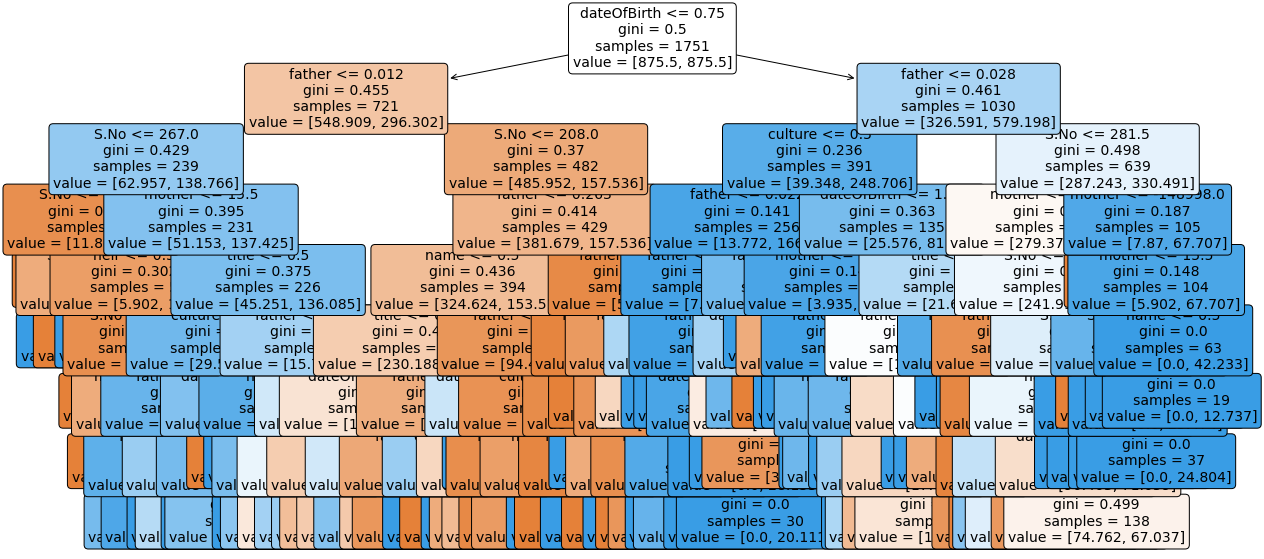

In [33]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = got.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

<h4> Confusion Matrix of Pruned Tree Model</h4>

In [34]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 34
False Positives: 16
False Negatives: 34
True Positives : 111



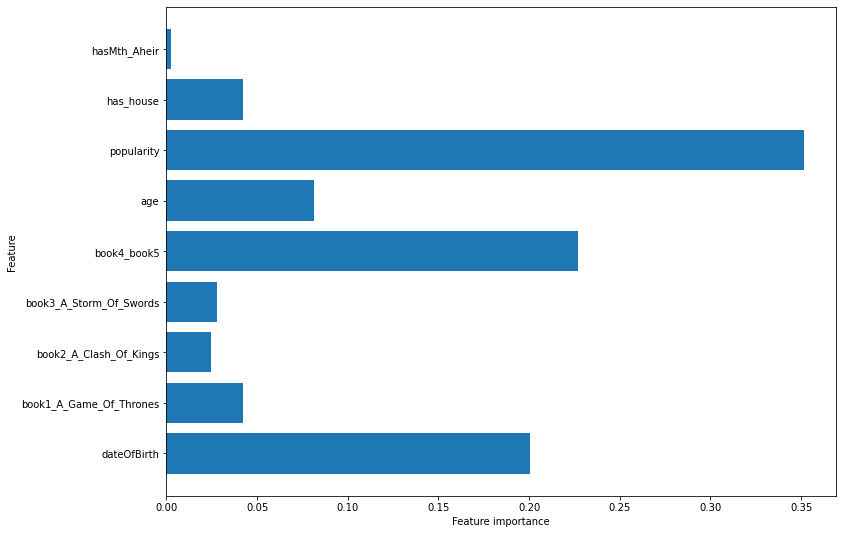

In [35]:
# plotting feature importance
plot_feature_importances(pruned_tree_fit,
                         train = x_train,
                         export = False)

<h4> Full Tree Model</h4>

In [36]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

# displaying and saving the gap between training and testing
print('Train-Test Gap   :', abs(full_tree_train_score - full_tree_test_score).round(4))
train_test_gap = abs(full_tree_train_score - full_tree_test_score ).round(4)


Full Tree Training ACCURACY: 0.924
Full Tree Testing ACCURACY : 0.8256
Full Tree AUC Score: 0.7714
Train-Test Gap   : 0.0984


<h4> Confusion Matrix of Full Tree Model</h4>

In [37]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 33
False Positives: 17
False Negatives: 17
True Positives : 128



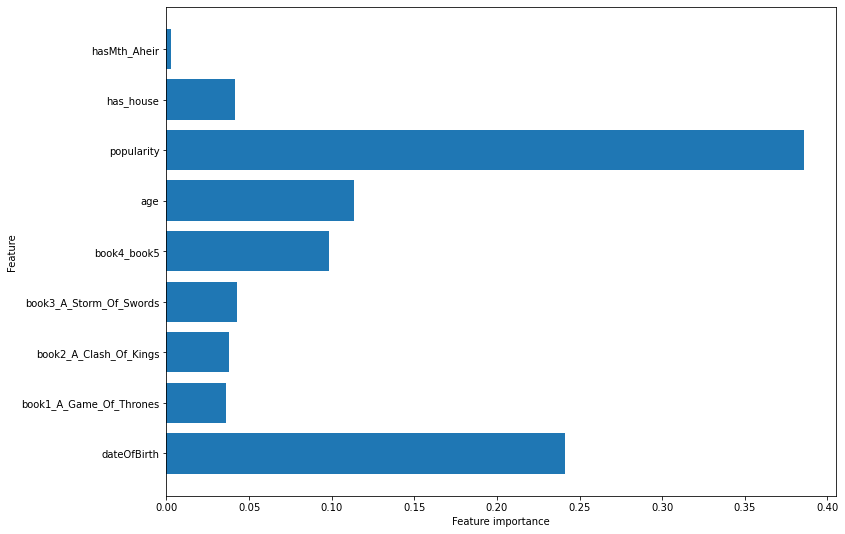

In [38]:
# plotting feature importance
plot_feature_importances(full_tree_fit,
                         train = x_train,
                         export = False)

<h3> Gradient Boosting Classifier </h3>

In [39]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case where only a sin

In [40]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(learning_rate = 0.1,
                                              n_estimators  = 110,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 6,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))


# saving AUC score for future use
gbm_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = full_gbm_default_pred).round(decimals = 4)


Training ACCURACY: 0.9081
Testing ACCURACY : 0.8769
AUC Score        : 0.7993


In [41]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 32
False Positives: 18
False Negatives: 6
True Positives : 139



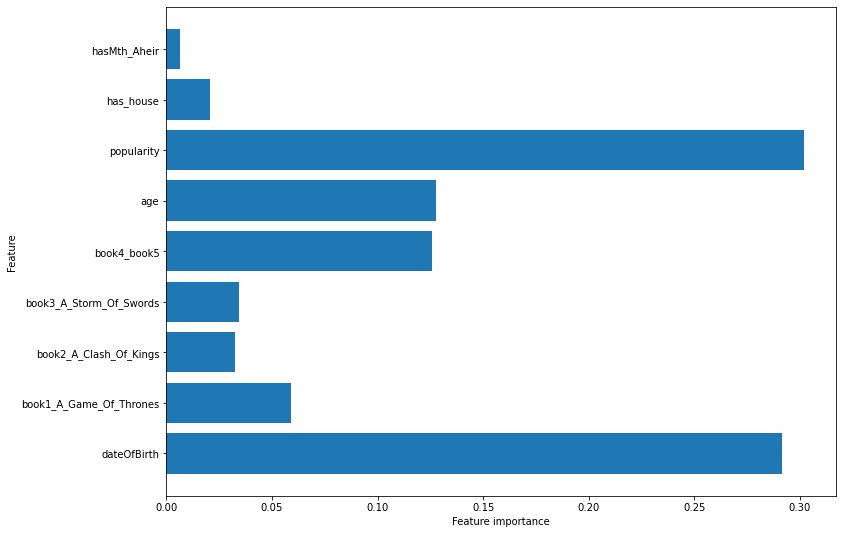

In [42]:
# plotting feature importance
plot_feature_importances(full_gbm_default_fit,
                         train = x_train,
                         export = False)

<h3> Final Model Analysis </h3>

In [43]:
# comparing results
print(f"""
  Model         AUC Score      TN, FP, FN, TP
  -----         ---------      --------------
  Logistic      {logreg_auc_score}        {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
  Full Tree     {full_tree_auc_score}        {full_tree_tn, full_tree_fp,full_tree_fn,full_tree_tp}
  Pruned Tree   {pruned_tree_auc_score}        {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
* GBM           {gbm_auc_score}        {gbm_default_tn,gbm_default_fp,gbm_default_fn, gbm_default_tp   } 



* means: final model
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}



  Model         AUC Score      TN, FP, FN, TP
  -----         ---------      --------------
  Logistic      0.7166        (22, 28, 1, 144)
  Full Tree     0.7714        (33, 17, 17, 128)
  Pruned Tree   0.7228        (34, 16, 34, 111)
* GBM           0.7993        (32, 18, 6, 139) 



* means: final model



<h4> Reasoning Behind Selection</h4>

<p> The final model selection was based upon the highest AUC Score, with that being said the chosen model is the Gradient Boosting Classifier. The goal of this dataset is to predict the characters that are alive in GOT, and minimize the predictions of FP. The GBM model noticeably performed well in the confusion matrix with a TP of 139 and FP of 18. Two of the most important features from the model is dateOfBirth and popularity as they both have a importance higher than 0.25  </p> 
